# Deutsch Jozsa Algorithm

In [105]:
import qiskit as q
import numpy as np
import matplotlib as mpl

In [106]:
# the oracle function takes n-bit input
n = 5

In [107]:
# define an unbalanced oracle
def oracle_balanced(n):
    size = np.random.randint(n)
    random_qubits = set(np.random.randint(n, size=(size)))
    
    qc = q.QuantumCircuit(n + 1)
    
    for qubit in random_qubits:
        qc.x(qubit)
    
    for qubit in range(n):
        qc.cx(qubit, n)
    
    for qubit in random_qubits:
        qc.x(qubit)
        
    return qc

In [108]:
# define a constant oracle that always returns 0
def oracle_zero(n):
    qc = q.QuantumCircuit(n + 1)
    return qc

In [109]:
# define a constant oracle that always returns 1
def oracle_one(n):
    qc = q.QuantumCircuit(n + 1)
    qc.x(n)
    return qc

In [110]:
# define an oracle function that decides whether to use a 'balanced' or a constant' oracle
def oracle(choice, n):
    if choice == 'balanced':
        oracle_qc = oracle_balanced(n)
    elif choice == 'constant':
        random = np.random.randint(2)
        if random:
            oracle_qc = oracle_one(n)
        else:
            oracle_qc = oracle_zero(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" 
    return oracle_gate
    

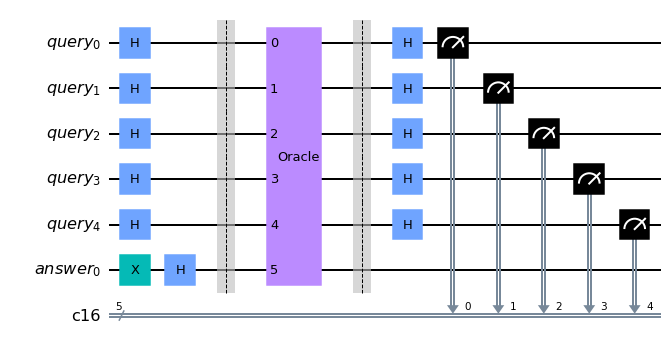

In [111]:
# Suppose the function take n-bit strings as input.
# define a query quantum register with n qubits and an answer quantum register with 1 qubit
query = q.QuantumRegister(n, 'query')
answer = q.QuantumRegister(1, 'answer')
classical = q.ClassicalRegister(n)

qc = q.QuantumCircuit(query, answer, classical)

# apply hadamard gates on all query qubits to create a superposition
qc.h(query)

# prepare the answer qubit in state |->
qc.x(answer)
qc.h(answer)

qc.barrier()

# apply the oracle
oracle_gate = oracle('constant', n)
qc.append(oracle_gate, range(n+1))
qc.barrier()

# apply hadamard gates on all query qubits to reverse the superposition
qc.h(query)

# measure the query qubits to calculate the result
qc.measure(query, classical)
qc.draw(output='mpl')

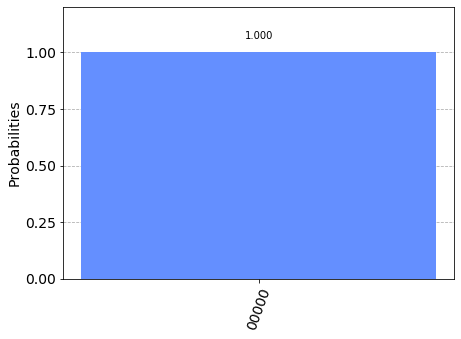

In [112]:
# execute the circuit on a qasm simulator
backend = q.Aer.get_backend('qasm_simulator')
job = q.execute(qc, backend, shots=1000)
result = job.result()
counts = result.get_counts()
graph = q.visualization.plot_histogram(counts)
display(graph)

# If the probability of all zeroes = 1, then the function is constant, otherwise it is balanced
# Hence, a single calculation solved the problem, which classically takes (2^N - 1) steps